In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Visualization of init exprimental results

/tmp/ipykernel_56285/911314879.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  ax.plot(context_lengths, dt_means[i], 'b-o', label='DT', color='darkorange')
/tmp/ipykernel_56285/911314879.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-o" (-> color='g'). The keyword argument will take precedence.
  ax.plot(context_lengths, dm_means[i], 'g-o', label='DM', color='green')


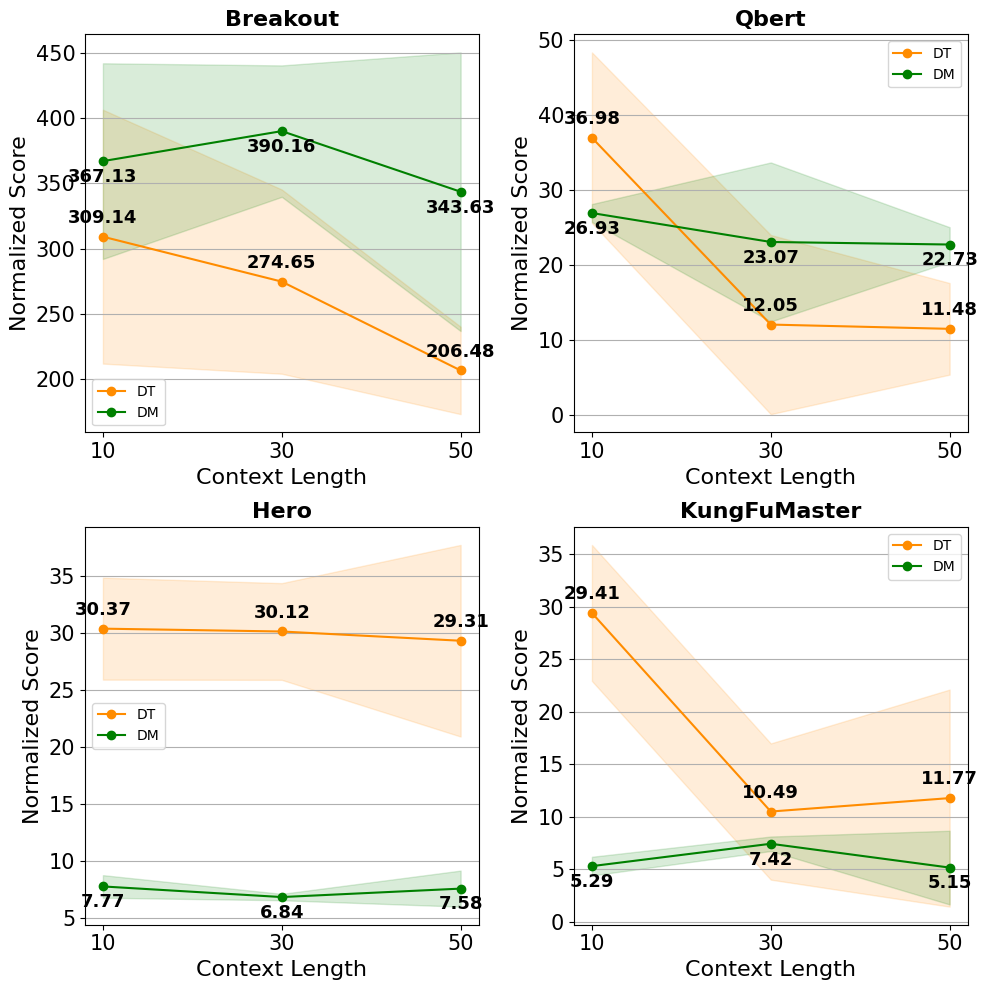

In [7]:
games = ['Breakout', 'Qbert', 'Hero', 'KungFuMaster']
context_lengths = [10, 30, 50]

dt_means = [
    [309.14, 274.65, 206.48],
    [36.98, 12.05, 11.48],
    [30.37, 30.12, 29.31],
    [29.41, 10.49, 11.77]
]

dt_stds = [
    [97.41, 70.69, 33.53],
    [11.38, 11.95, 6.11],
    [4.47, 4.24, 8.40],
    [6.48, 6.49, 10.34]
]

dm_means = [
    [367.13, 390.16, 343.63],
    [26.93, 23.07, 22.73],
    [7.77, 6.84, 7.58],
    [5.29, 7.42, 5.15]
]

dm_stds = [
    [75.09, 50.43, 106.93],
    [1.20, 10.61, 2.31],
    [0.99, 0.28, 1.58],
    [0.89, 0.69, 3.51]
]

fig, axs = plt.subplots(2, 2, figsize=(10,10))

for i, game in enumerate(games):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    ax.plot(context_lengths, dt_means[i], 'b-o', label='DT', color='darkorange')
    ax.fill_between(context_lengths, 
                    np.array(dt_means[i]) - np.array(dt_stds[i]), 
                    np.array(dt_means[i]) + np.array(dt_stds[i]), 
                    alpha=0.15, color='darkorange')
    
    ax.plot(context_lengths, dm_means[i], 'g-o', label='DM', color='green')
    ax.fill_between(context_lengths, 
                    np.array(dm_means[i]) - np.array(dm_stds[i]), 
                    np.array(dm_means[i]) + np.array(dm_stds[i]), 
                    alpha=0.15, color='green')
    
    ax.set_xlabel('Context Length', fontsize=16)
    ax.set_ylabel('Normalized Score', fontsize=16)
    ax.set_title(game, fontsize=16, fontweight='bold')
    ax.set_xticks(context_lengths)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.legend()
    ax.grid(True, which='major', axis='y')  # Enable grid only on y-axis
    
    # Add value labels for each point
    for j, (dt_mean, dm_mean) in enumerate(zip(dt_means[i], dm_means[i])):
        ax.annotate(f'{dt_mean:.2f}', (context_lengths[j], dt_mean), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontweight='bold', fontsize=13)
        ax.annotate(f'{dm_mean:.2f}', (context_lengths[j], dm_mean), textcoords="offset points", 
                    xytext=(0,-15), ha='center', fontweight='bold', fontsize=13)

plt.tight_layout()
# plt.show()
plt.savefig('dt_vs_dm.pdf', dpi=300)


### Action Distribution of the last 1% of the dataset

/tmp/ipykernel_108419/266367678.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actions, y=percentages, palette=palette, ax=ax, edgecolor='black', linewidth=1.2)


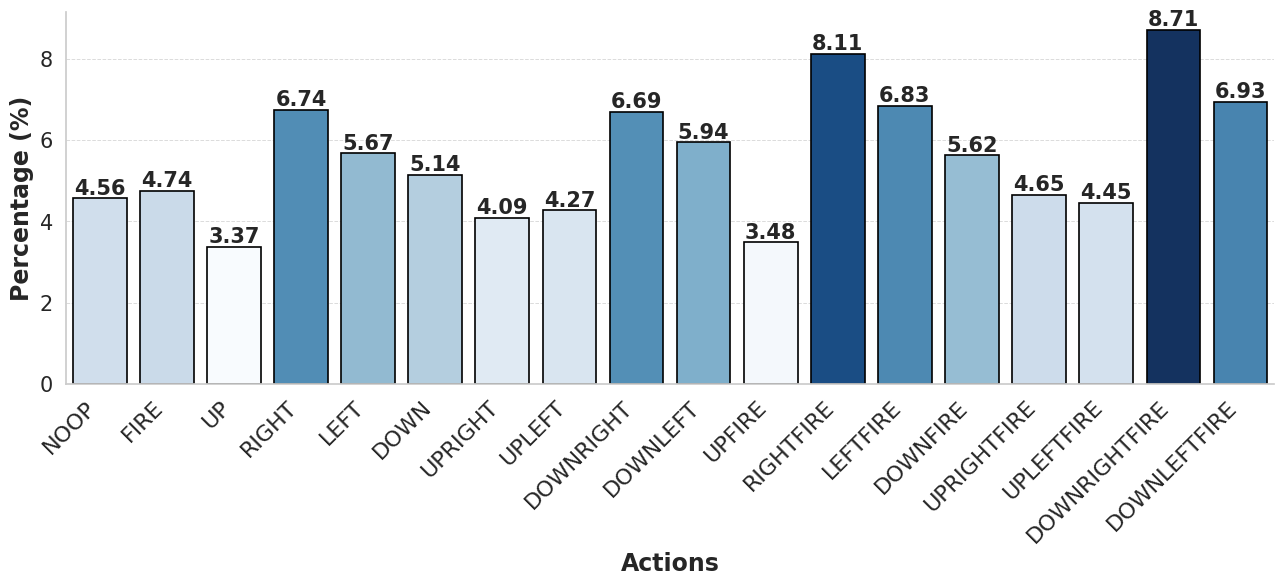

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

actions = [
    'NOOP', 'FIRE', 'UP', 'RIGHT', 'LEFT', 'DOWN', 'UPRIGHT', 'UPLEFT', 
    'DOWNRIGHT', 'DOWNLEFT', 'UPFIRE', 'RIGHTFIRE', 'LEFTFIRE', 'DOWNFIRE', 
    'UPRIGHTFIRE', 'UPLEFTFIRE', 'DOWNRIGHTFIRE', 'DOWNLEFTFIRE'
]
percentages = [
    4.56, 4.74, 3.37, 6.74, 5.67, 5.14, 4.09, 4.27, 6.69, 5.94, 3.48, 8.11, 
    6.83, 5.62, 4.65, 4.45, 8.71, 6.93
]

# Normalize the percentages for better color mapping
norm = plt.Normalize(min(percentages), max(percentages))
colors = sns.color_palette("Blues", as_cmap=True)
palette = [colors(norm(value)) for value in percentages]

# Create the bar plot
fig, ax = plt.subplots(figsize=(13, 6))
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
sns.barplot(x=actions, y=percentages, palette=palette, ax=ax, edgecolor='black', linewidth=1.2)

# Adding percentage labels on top of each bar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{percentages[i]:.2f}', 
            ha="center", fontsize=15, fontweight='bold')

# Setting labels and title
ax.set_xlabel('Actions', fontsize=17, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=17, fontweight='bold')

# Customize tick parameters
plt.xticks(rotation=45, ha='right', fontsize=16, fontweight='medium')
plt.yticks(fontsize=15, fontweight='medium')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('action_distribution.pdf', format='pdf', dpi=300)


### Average results over 3 seeds

In [6]:
def process_experiment_data(base_path, experiment_prefix):
    seeds = ["123", "132", "321"]
    data_frames = []
    
    # Loop through each seed and load the corresponding summary.csv
    for seed in seeds:
        file_path = os.path.join(base_path, f"{experiment_prefix}{seed}", "summary.csv")
        df = pd.read_csv(file_path)
        data_frames.append(df)

    
    # Combine data frames and calculate average
    if data_frames:
        combined_data = pd.concat(data_frames)
        average_data = combined_data.groupby('epoch').mean()
        return average_data
    else:
        return None  # or appropriate response like an empty DataFrame


### To CSV

In [7]:
base_path = "~/msc-project/atari/output/atari_30/"
experiment_types = ["dmamba_hero", "dtrans_hero", "dmamba_kungfumaster", "dtrans_kungfumaster"]  # add more as needed

experiment_results = {}

for experiment in experiment_types:
    result = process_experiment_data(base_path, experiment)
    if result is not None:
        experiment_results[experiment] = result
        # print(f"Results for {experiment}:")
        # print(result)
        # print("\n")
        # Save to csv with prefix avg_
        result.to_csv(f"avg_{experiment}.csv")
    else:
        print(f"No data processed for {experiment}")

### Plot

In [8]:
def load_experiment_data(base_path, experiment_prefix):
    seeds = ["123", "132", "321"]
    data_frames = []
    
    # Load data for each seed
    for seed in seeds:
        file_path = f"{base_path}{experiment_prefix}{seed}/summary.csv"
        df = pd.read_csv(file_path)
        df['epoch'] += 1
        data_frames.append(df)
    
    return data_frames  # return list of dataframes

In [426]:
# def plot_training_loss(base_path, experiment_types, task_name):
#     plt.figure(figsize=(5, 4))
    
#     # Define colors and styles
#     colors = {'Decision Mamba': 'red', 'Decision Transformer': 'green'}
#     styles = {'seed': {'alpha': 0.4, 'linestyle': '--'}, 'avg': {'alpha': 1.0, 'linestyle': '-'}}
    
#     for experiment in experiment_types:
#         data_frames = load_experiment_data(base_path, experiment)
#         model_name = "Decision Mamba" if "dmamba" in experiment else "Decision Transformer"
        
#         if data_frames:
#             # Plot each seed's training loss
#             for df in data_frames:
#                 plt.plot(df['epoch'], df['training/train_loss_mean'], color=colors[model_name], **styles['seed'])
            
#             # Calculate and plot the average training loss
#             combined_data = pd.concat(data_frames)
#             average_data = combined_data.groupby('epoch').mean()
#             plt.plot(average_data.index, average_data['training/train_loss_mean'], label=f'{model_name}', color=colors[model_name], **styles['avg'])
    
#     # plt.title(f"Training Loss Over Epochs for {task_name}")
#     plt.xlabel("Epoch")
#     plt.ylabel("Training Loss")
#     plt.xticks(range(1, 6))  # Set x-axis ticks to show epochs from 1 to 5
#     plt.legend()
#     plt.show()



# base_path = "~/msc-project/atari/output/atari_1/"
# experiment_types = ["dmamba_breakout", "dtrans_breakout"]  # focusing on breakout
# plot_training_loss(base_path, experiment_types, "Breakout")

# base_path = "~/msc-project/atari/output/atari_1/"
# experiment_types = ["dmamba_qbert", "dtrans_qbert"]  # focusing on breakout
# plot_training_loss(base_path, experiment_types, "Qbert")

In [9]:
def plot_metric_over_epochs(base_path, experiment_types, task_name, metric):
    plt.figure(figsize=(5, 4))
    
    # Define colors and styles
    colors = {'Decision Mamba': 'orange', 'Decision Transformer': 'green'}
    styles = {'seed': {'alpha': 0.4, 'linestyle': '--'}, 'avg': {'alpha': 1.0, 'linestyle': '-'}}
    
    for experiment in experiment_types:
        data_frames = load_experiment_data(base_path, experiment)
        model_name = "Decision Mamba" if "dmamba" in experiment else "Decision Transformer"
        
        if data_frames:
            # Plot each seed's metric
            for df in data_frames:
                plt.plot(df['epoch'], df[metric], color=colors[model_name], **styles['seed'])
            
            # Calculate and plot the average metric
            combined_data = pd.concat(data_frames)
            average_data = combined_data.groupby('epoch').mean()
            plt.plot(average_data.index, average_data[metric], label=f'{model_name}', color=colors[model_name], **styles['avg'])
    
    plt.title(f"{task_name}")
    plt.xlabel("Epoch")
    plt.ylabel(metric.replace('/', ' ').title())
    plt.xticks(range(1, 6))  # Set x-axis ticks to show epochs from 1 to 5
    plt.legend()
    plt.show()


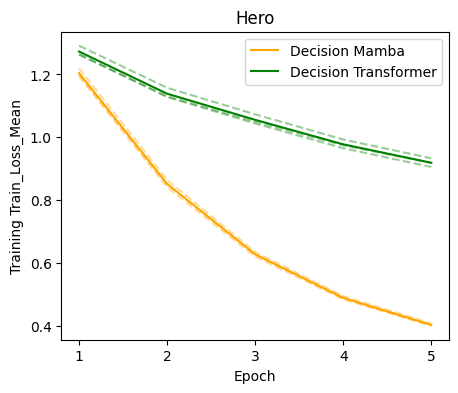

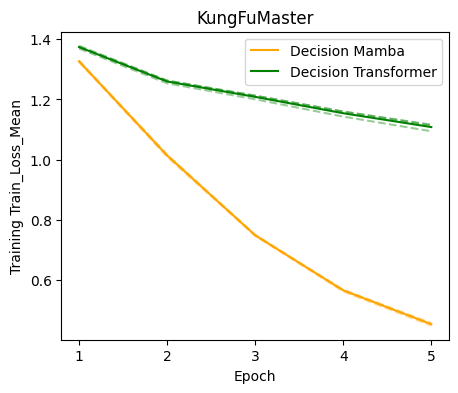

In [10]:
base_path = "~/msc-project/atari/output/atari_30/"
experiment_types = ["dmamba_hero", "dtrans_hero"]  
metric = "training/train_loss_mean"  # change this to other metrics if needed
plot_metric_over_epochs(base_path, experiment_types, "Hero", metric)

# base_path = "~/msc-project/atari/output/atari_30/"
# experiment_types = ["dmamba_breakout", "dtrans_breakout"] 
# metric = "time/total" 
# plot_metric_over_epochs(base_path, experiment_types, "Breakout", metric)



base_path = "~/msc-project/atari/output/atari_30/"
experiment_types = ["dmamba_kungfumaster", "dtrans_kungfumaster"]  
metric = "training/train_loss_mean"  
plot_metric_over_epochs(base_path, experiment_types, "KungFuMaster", metric)

# base_path = "~/msc-project/atari/output/atari_1/"
# experiment_types = ["dmamba_qbert", "dtrans_qbert"] 
# metric = "time/total" 
# plot_metric_over_epochs(base_path, experiment_types, "Qbert", metric)

### Normalized score

In [429]:
import pandas as pd

def calculate_normalized_score(raw_scores, score_random, score_expert):
    return 100 * (raw_scores - score_random) / (score_expert - score_random)

def process_experiment_results(base_path, experiment_prefix, game):
    seeds = ["123", "213", "321"]
    normalized_scores = []

    # Game specific random and expert scores
    score_random = {
        'Breakout': 1.7, 'Qbert': 163.9, 'Pong': -20.7, 'Seaquest': 68.4
    }
    score_expert = {
        'Breakout': 30.5, 'Qbert': 13455.0, 'Pong': 14.6, 'Seaquest': 42054.7
    }

    for seed in seeds:
        file_path = f"{base_path}{experiment_prefix}{seed}/summary.csv"
        if pd.read_csv(file_path).empty:
            print(f"Warning: No data in {file_path}")
            continue

        # Load last epoch data
        last_epoch_data = pd.read_csv(file_path).iloc[-1]
        raw_score = last_epoch_data['evaluation/eval_return']

        # Calculate normalized score
        normalized_score = calculate_normalized_score(raw_score, score_random[game], score_expert[game])
        normalized_scores.append(normalized_score)

    if normalized_scores:
        return pd.Series(normalized_scores).agg(['mean', 'std'])
    else:
        return None


In [430]:
base_path = "~/msc-project/atari/output/atari_1/"

experiment_prefix = "dmamba_breakout"
game = "Breakout"
results = process_experiment_results(base_path, experiment_prefix, game)
results = results.round(2) # Round to 2 decimal places
print(f"Game: {game} \nModel: {experiment_prefix}")
print(results)
print()

experiment_prefix = "dtrans_breakout"
game = "Breakout"
results = process_experiment_results(base_path, experiment_prefix, game)
results = results.round(2) # Round to 2 decimal places
print(f"Game: {game} \nModel: {experiment_prefix}")
print(results)
print()

experiment_prefix = "dmamba_qbert"
game = "Qbert"
results = process_experiment_results(base_path, experiment_prefix, game)
results = results.round(2) # Round to 2 decimal places
print(f"Game: {game} \nModel: {experiment_prefix}")
print(results)
print()

experiment_prefix = "dtrans_qbert"
game = "Qbert"
results = process_experiment_results(base_path, experiment_prefix, game)
results = results.round(2) # Round to 2 decimal places
print(f"Game: {game} \nModel: {experiment_prefix}")
print(results)
print()


Game: Breakout 
Model: dmamba_breakout
mean    175.81
std      36.96
dtype: float64

Game: Breakout 
Model: dtrans_breakout
mean    195.25
std      36.98
dtype: float64

Game: Qbert 
Model: dmamba_qbert
mean    17.21
std     13.38
dtype: float64

Game: Qbert 
Model: dtrans_qbert
mean    3.85
std     2.06
dtype: float64

